# Penguin Dataset analysis 

In [1]:
##Import packages
import pandas as pd
import scipy.stats as ss
import missingno as msno 

In [2]:
#Import csv file
csv_path = r"C:\Users\kehin\Downloads\penguins.csv"
penguin_dataset = pd.read_csv(csv_path)

Let's explore the dataset

In [3]:
penguin_dataset.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [4]:
penguin_dataset.shape

(344, 7)

In [5]:
penguin_dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
#Any missing value
penguin_dataset.isnull().sum() #orpenguin_dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<Axes: >

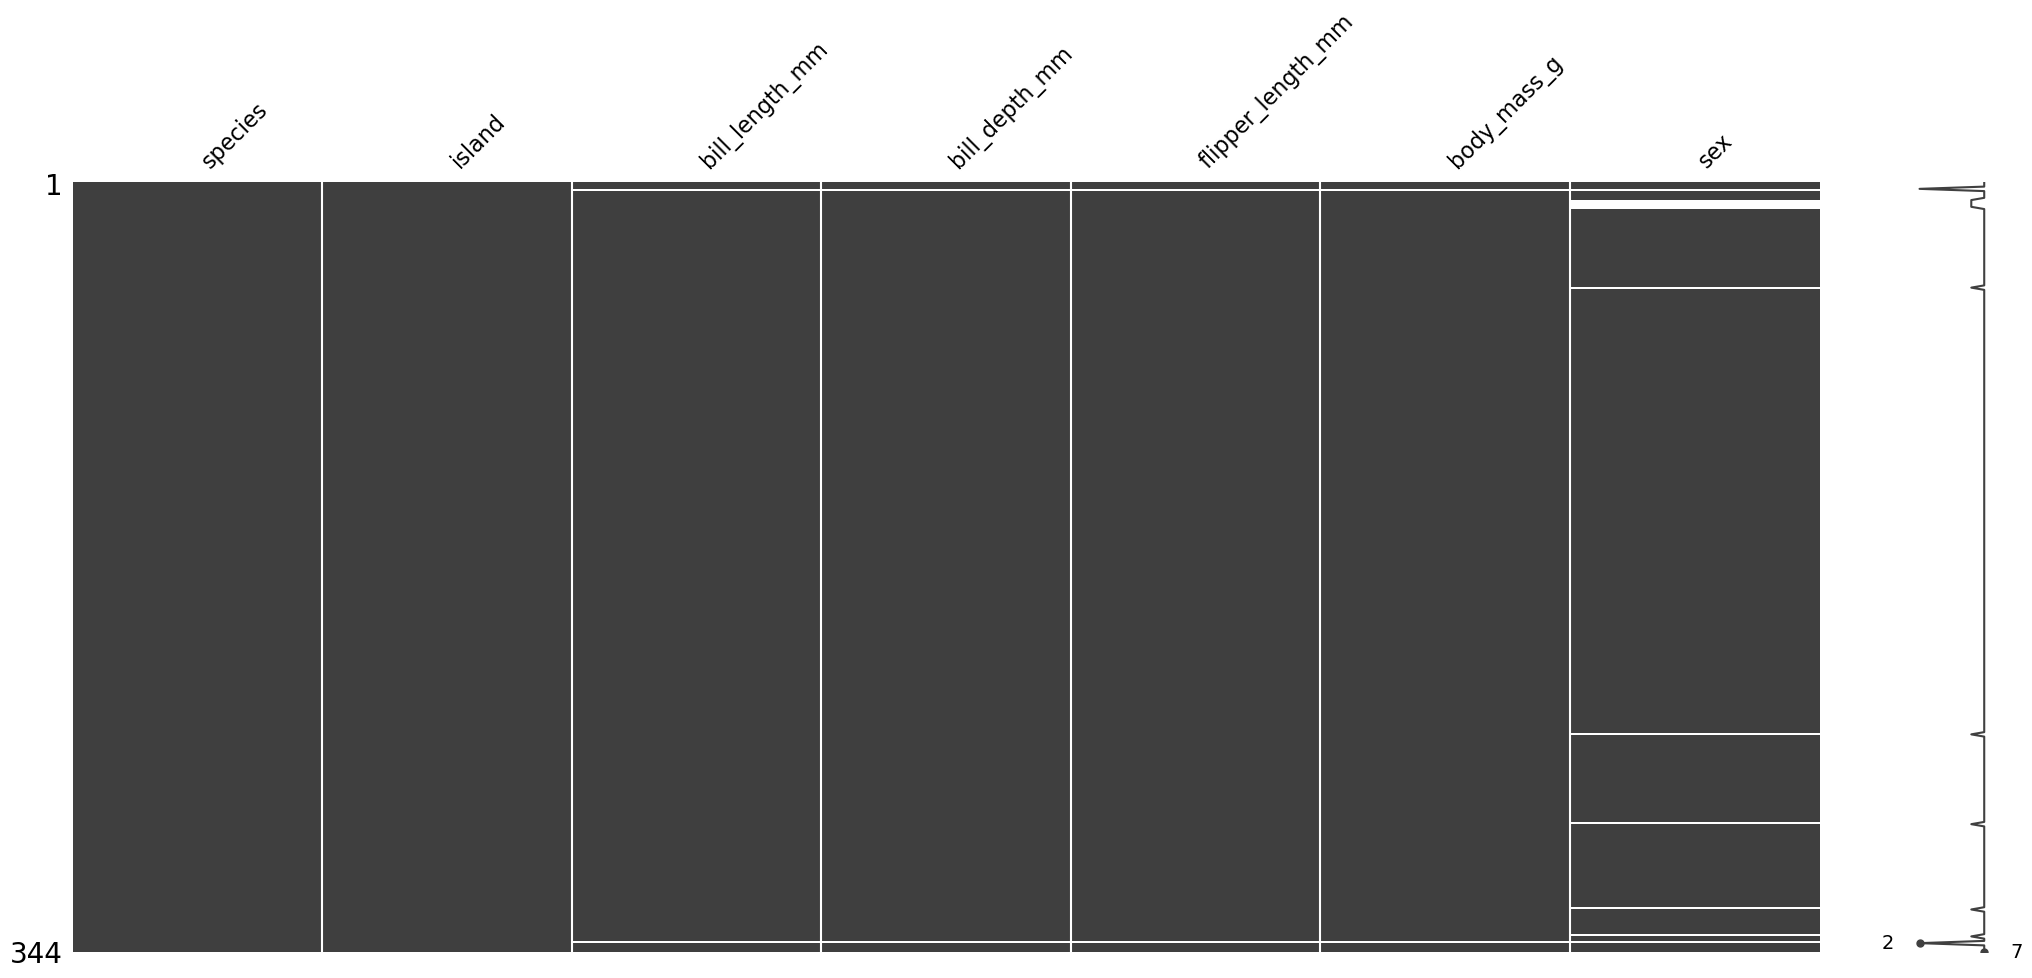

In [7]:
# Visualize missing values as a matrix 
msno.matrix(penguin_dataset) 

In [9]:
###Clean up missing values by dropping missing rows
penguin_dataset_dropped = penguin_dataset.dropna()

penguin_dataset_dropped.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
###Clean up missing values by replacing missing rows

bill_length_mean = penguin_dataset["bill_length_mm"].mean() #mode, median
bill_depth_mean = penguin_dataset["bill_depth_mm"].mean()
flipper_mean = penguin_dataset["flipper_length_mm"].mean()
body_mass_mean = penguin_dataset["body_mass_g"].mean()
sex_mode = penguin_dataset["sex"].mode()

penguin_dataset_filled = penguin_dataset.copy()

penguin_dataset_filled["body_mass_g"].fillna(body_mass_mean, inplace=True)
penguin_dataset_filled["bill_length_mm"].fillna(bill_length_mean, inplace=True)
penguin_dataset_filled["bill_depth_mm"].fillna(bill_depth_mean, inplace=True)
penguin_dataset_filled["flipper_length_mm"].fillna(flipper_mean, inplace=True)
penguin_dataset_filled["sex"].fillna(sex_mode[0], inplace=True)

penguin_dataset_filled.isnull().sum()###Clean up missing values by dropping missing rows



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
##Select pengiuns with 'Gentoo' species

gentoo_penguins = penguin_dataset_dropped[penguin_dataset_dropped["species"] == "Gentoo"]
#gentoo_penguins = penguin_dataset_filled[penguin_dataset_filled["species"] == "Gentoo"]

gentoo_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE


In [13]:
###Select male and female gentoos

male_gentoo = gentoo_penguins[gentoo_penguins["sex"] == "MALE"]
female_gentoo = gentoo_penguins[gentoo_penguins["sex"] == "FEMALE"]

In [14]:
male_gentoo.head(3) ##Male pengiuns

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE


In [15]:
female_gentoo.head(3) ##Female pengiuns

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,FEMALE


In [16]:
##A t-test on the penguins data set to investigate whether there is evidence of a significant difference 
#in the body mass of male and female gentoo penguins.
##Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

t_statistic, p_value = ss.ttest_ind(male_gentoo["body_mass_g"], female_gentoo["body_mass_g"])

In [17]:
# Output the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 14.721676481405709
P-Value: 2.133687602018886e-28


In [18]:
# Determine if the difference is significant at a specific significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is significant evidence of a difference in body mass between male and female Gentoo penguins.")
else:
    print("There is no significant evidence of a difference in body mass between male and female Gentoo penguins.")


There is significant evidence of a difference in body mass between male and female Gentoo penguins.
